<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---

**The objective of the project is to apply all the skills & techniques, learned in Term 1 & Term 2 of GCDAI program at INSAID, to a real-world problem.** 

**About me**, _Rayan Kazi, Electronics and Communication Engineer (2021), learning at INSAID (Batch- Aug 22, 2020), you can find more about me on..._

Did you know that about 165,000 cars are manufactured every day? And there are almost 1 billion cars in use worldwide. The benefits of owning a personal car is mesmerizing for an individual, including me! Today, they are one of the factors behind fast-paced development.

Here, we will perform an EDA on used cars dataset and gain some valuable insights on what all factors affect a car's price.

<p align="center"><img src="https://visme.co/blog/wp-content/uploads/2020/06/animated-interactive-infographics-header-wide.gif"></p>

---
<a name = Section2></a>
# **2. Problem Statement**
---

  
**Identify** the **factors** that affect a **second-hand car's value**, leading us to create a **car price prediction model** in **near future,** which may **help the buyers to learn the actual market value of a car before buying or selling.**

- Before we create our own car price prediction model, let's understand on what really affects a car's price.

- In this notebook, with EDA, we will work to get the solutions for below mentioned business questions.

- **Questions we will be answering:**
  1. Which is the most popular car brand?

  2. Which engine type is preferred the most and how is price affected by it?

  3. What car body type is the most popular and how is price affected by it?

  4. What model year cars are high for sale?
  
  5. How do the model year affects the resale values in different brands?

  6. What is the percentage of unregistered cars?

  7. How do unregistered car differ from registered car in price?

  

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

- Let's get started with installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [1]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
# To install more libraries insert your code here..

### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [2]:
!pip install -q --upgrade pandas-profiling                          # Upgrading pandas profiling to the latest version

### **Importing Libraries**


In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                             # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- In this section, we work with accquiring the data and obtaining some descriptive information out of it.

- But, before going further let's have a good idea about the features of the data set:

|Id|Feature|Description|
|:--|:--|:--|
|01| car           | Car brand name| 
|02| model         | Available car different Variants|  
|03| year          | purchasing Year| 
|04| body          | Body type-Hatchback, Sedan, Crossover etc|   
|05| mileage       | car Mileage|
|06| engV          | Engine version|
|07| engType       | Car Fuel type - Petrol, Diesel, gas etc|
|08| drive         | Wheel Drive Front, back|
|09| registration  | Check if the vechile is registered|
|10| price         | Price of Car in $|


In [4]:
data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='cp1252')
print('Data Shape:', data.shape)
data.sample(10)

Data Shape: (9576, 10)


,car,price,body,mileage,engV,engType,registration,year,model,drive
3622,Fiat,7700.0,vagon,223,1.9,Diesel,yes,2008,Doblo ïàññ.,front
111,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
7908,Hyundai,9800.0,crossover,66,2.0,Petrol,yes,2007,Tucson,front
5429,Volkswagen,13999.0,van,175,2.0,Diesel,yes,2012,T5 (Transporter) ãðóç,front
2218,Mercedes-Benz,9500.0,van,248,2.2,Diesel,yes,2005,Vito ïàññ.,rear
8978,Chevrolet,5800.0,crossover,130,1.7,Gas,yes,2005,Niva,full
5884,Ford,8900.0,vagon,260,1.8,Diesel,yes,2008,Focus,front
494,Smart,8800.0,other,26,1.0,Petrol,yes,2011,Fortwo,rear
2730,Chrysler,12500.0,sedan,27,2.4,Petrol,yes,2006,PT Cruiser,NaN
9521,Daewoo,4600.0,sedan,116,1.5,Gas,yes,2010,Lanos,front


### **Data Description**

- To get some quick description out of the data you can use describe method defined in pandas library.

In [5]:
data.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000




*   **Minimum price** of a **car** is **0$.** We should look into more details of these specific free cars before concluding.
* **Minimum mileage** is also **0**, but it wouldn't be surprising as there are owners who regret buying a first-hand car and sell it then.



### **Data Information**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB




*   Information obtained is stored with proper data types.
*   But there are **434 missing values** in **engV** and **511** in **drive.**Nevertheless, we can ignore the missing values for now.



---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- We need to perform pandas profiling and get some observations out of it...

In [7]:
profile = data.profile_report(title="Used Cars dataset's Profiling before Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="used_cars_profiling_before_preprocessing.html")

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- Column **engV** which specifies the engine version can be **dropped** as it provides **no sufficient or useful insights to the data.**

In [8]:
data.drop(['engV'], axis=1, inplace=True)

In [9]:
data.head()

,car,price,body,mileage,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,Other,yes,2013,E-Class,NaN


* While obtaining some quick description, we found the values of price to be erroneous. Let's check for rows which have price as 0.00$ .

In [10]:
data.loc[data.price == 0]

,car,price,body,mileage,engType,registration,year,model,drive
20,Land Rover,0.0,crossover,0,Diesel,yes,2016,Range Rover,full
53,Mercedes-Benz,0.0,crossover,0,Diesel,yes,2016,GLE-Class,full
70,Mercedes-Benz,0.0,crossover,0,Diesel,yes,2016,GLE-Class,full
71,Toyota,0.0,crossover,0,Diesel,yes,2016,Land Cruiser 200,full
90,Porsche,0.0,sedan,22,Petrol,yes,2014,Panamera,full
...,...,...,...,...,...,...,...,...,...
9019,Toyota,0.0,hatch,76,Petrol,yes,2007,Aygo,front
9025,Mercedes-Benz,0.0,crossover,1,Petrol,yes,2016,GLE-Class,full
9036,Ford,0.0,other,1,Petrol,yes,2014,Mustang,rear
9442,Renault,0.0,vagon,137,Diesel,yes,2008,Kangoo ïàññ.,front


* There are **267 zero values** for **price!** Maybe the entry person forgot to input the price or the owner was not willing to disclose the price to unwilling buyers.
* We will consider dropping these rows.

In [11]:
data.drop(data[data.price == 0].index, inplace=True)
data.head()

,car,price,body,mileage,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,Other,yes,2013,E-Class,NaN


* As we have finished pre-processing, let us check the dataframe size before moving further.

In [12]:
data.shape

(9309, 9)

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- This section is emphasised on getting a report about the data after the data manipulation.

- We may end up observing some new changes, so we should keep it under check and make right observations.

In [13]:
profile = data.profile_report(title="Used Cars dataset's Profiling after Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="used_cars_profiling_after_preprocessing.html")

* **Perfect!** We can move further.

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

It's time to perform an analysis and start answering the questions!

**1. Which is the most popular car brand?**  
Let's have a look on data by plotting the 10 top popular car brands.

In [14]:
popular_brands = data.car.value_counts().head(10)
popular_brands

Volkswagen       908
Mercedes-Benz    852
BMW              669
Toyota           523
VAZ              480
Renault          456
Audi             442
Opel             395
Nissan           366
Skoda            363
Name: car, dtype: int64

A bar chart would be a good way to visualize this information.

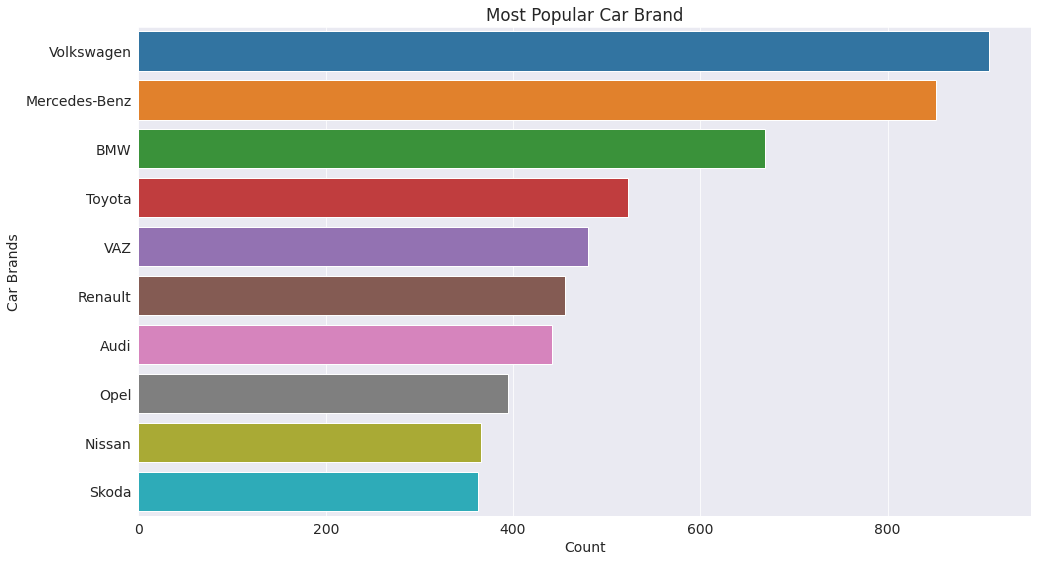

In [15]:
plt.figure(figsize=(16,9))
plt.title('Most Popular Car Brand')
plt.xlabel('Count')
plt.ylabel('Car Brands')
sns.barplot(x = popular_brands.values, y = popular_brands.index);

Surprisingly, **Volkswagen** and **Mercedes-Benz** are the **most popular brands**. Maybe the dataset is of a well-developed country.

**2. Which engine type is preferred the most?**  
Undoubtedly, Petrol! Let's see. We can visualize this information using a donut chart.

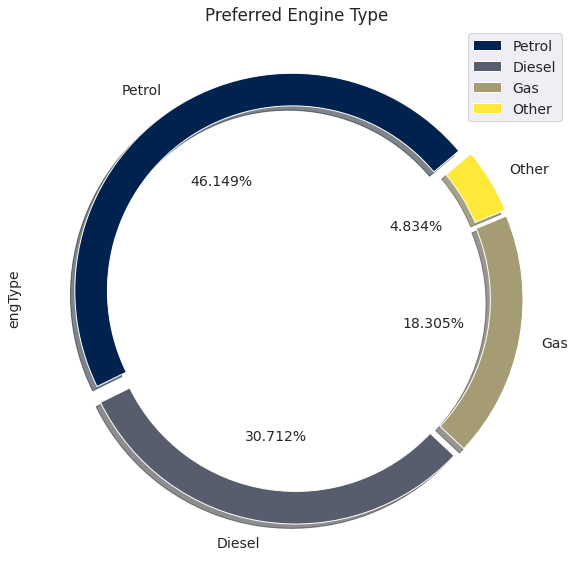

In [16]:
plt.figure(figsize=(10,10))
plt.title("Preferred Engine Type")
space = np.ones(4)/25 
data['engType'].value_counts().plot(kind='pie', explode=space, autopct='%.3f%%', wedgeprops=dict(width=0.15), startangle=40, figsize=(10,10), shadow=True, cmap='cividis', legend=True);


Well, as expected! **Petrol** is the **most preferred engine type**, followed by Diesel. Car engines are mostly built for petrol and diesel as they are widely abundant. Nowadays Car engines built for Gas and Hybrid cars are also on rise due to the concerning factor of global warming.

**Let's see whether this data of engine type variates for the top car brands.**

In [17]:
topbrands = ['Volkswagen','Mercedes-Benz','BMW', 'Toyota', 'VAZ', 'Renault', 'Audi', 'Opel', 'Nissan', 'Skoda']
topbrands_df = data.loc[data.car.isin(topbrands)]


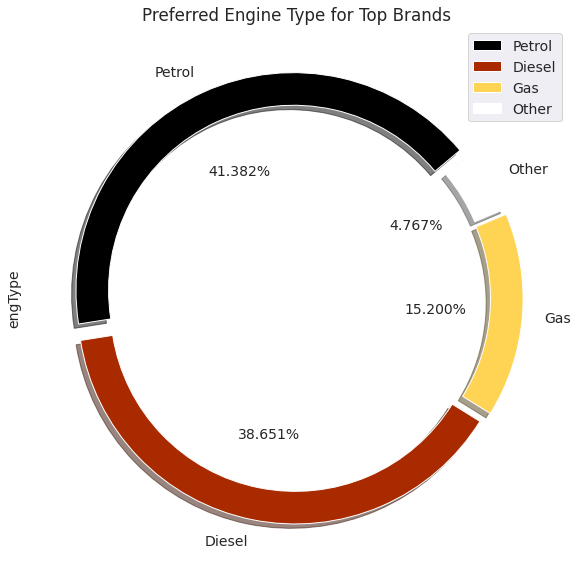

In [18]:
plt.figure(figsize=(10,10))
plt.title("Preferred Engine Type for Top Brands")
space = np.ones(4)/25 
topbrands_df['engType'].value_counts().plot(kind='pie', explode=space, autopct='%.3f%%', wedgeprops=dict(width=0.15), startangle=40, figsize=(10,10), shadow=True, cmap='afmhot', legend=True);


- Though for overall data Petrol engine type preference is higher, when analysed **for top car brands, Petrol and Diesel engine types are almost equally preferred.** 
- **Gas engine type preference** in popular brands **is lower**. Mainly, due to the fact that the top brands don't prefer making more of gas engine type cars.

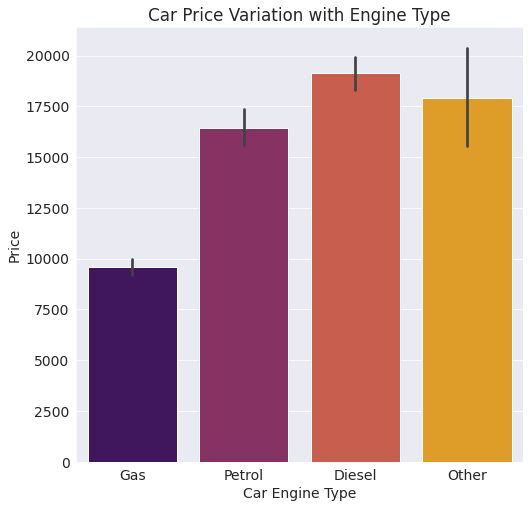

In [19]:
plt.figure(figsize=(8,8))
sns.barplot( x=data.engType, y=data.price, data=data, palette='inferno');
plt.xlabel('Car Engine Type');
plt.ylabel('Price');
plt.title('Car Price Variation with Engine Type');

**3. What car body type is the most popular?**


In [20]:
popular_bodyType = data.body.value_counts()
popular_bodyType

sedan        3585
crossover    1971
hatch        1236
van          1007
other         810
vagon         700
Name: body, dtype: int64

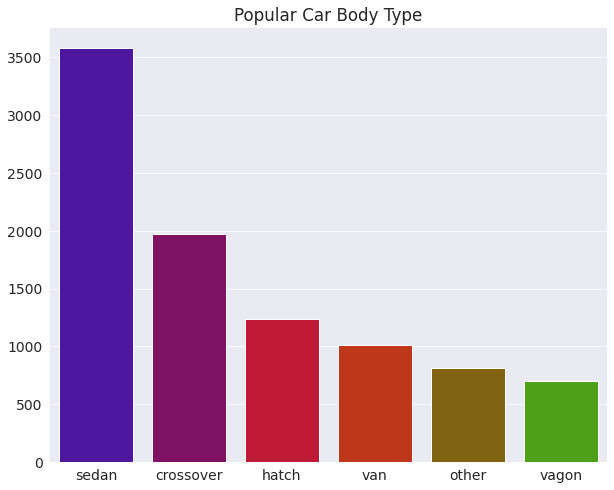

In [21]:
plt.figure(figsize=(10,8))
plt.title('Popular Car Body Type')
sns.barplot(x = popular_bodyType.index, y = popular_bodyType.values, palette='brg');

**Sedan** is the most **popular body type** among cars. Although there are significant number of other body type cars too. People usually buy cars of specific body type related to their requirements. 

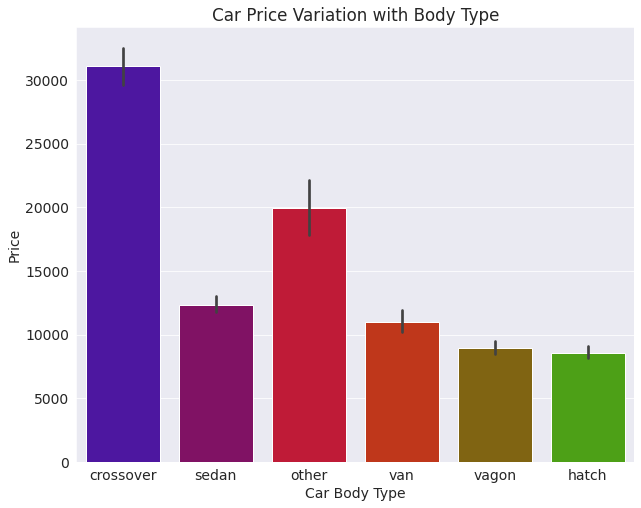

In [22]:
plt.figure(figsize=(10,8))
sns.barplot( x=data.body, y=data.price, data=data, palette='brg');
plt.xlabel('Car Body Type');
plt.ylabel('Price');
plt.title('Car Price Variation with Body Type');

As Sedan is a popular body type, it's price is economic. While, **crossover** is the **most expensive body type.**

**4. What model year cars are high for sale?**  
For this, we will group the years in 8 groups each consisting of 8 years.

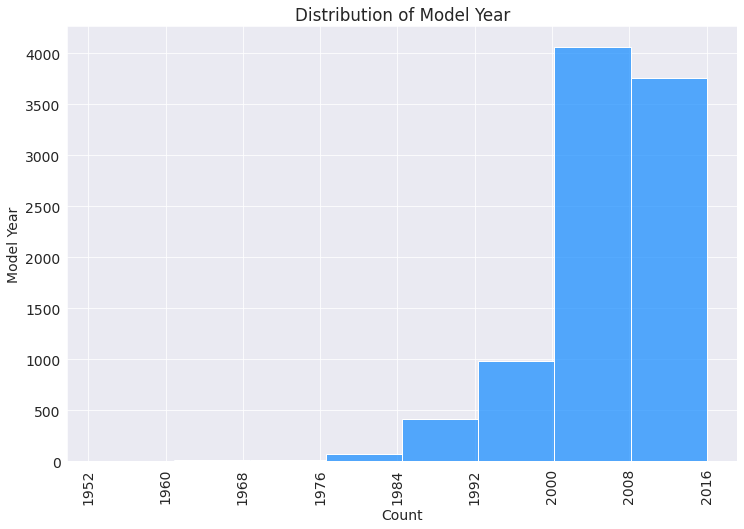

In [23]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Model Year');
plt.xlabel('Count')
plt.ylabel('Model Year')
sns.histplot(x=data.year, bins=8, color='dodgerblue');
bins = [1952, 1960, 1968, 1976, 1984, 1992, 2000, 2008, 2016];
plt.xticks(bins, rotation=90);

As we can see, **2000-2008** and **2008-2016** model year group has a large number of cars for sale. For analysis of price, these groups would be considered separately.

**5. How do the model year affects the resale values in different brands?**  
The value of a car drops as it ages. But, it won't be the same for all brands. Let's check out which brand's price is affected the most, considering the top brands only.

_Separate dataframe for year group **2008-2016**._

In [24]:
yeargroup_08_16 = topbrands_df.loc[data.year >= 2008]
yeargroup_08_16.shape

(2640, 9)

_Separate dataframe for year group **2000-2008**._

In [25]:
yeargroup_00_08 = topbrands_df.loc[(data.year < 2008) & (data.year >= 2000)]
yeargroup_00_08.shape

(1885, 9)

We can plot it using a stacked bar chart.

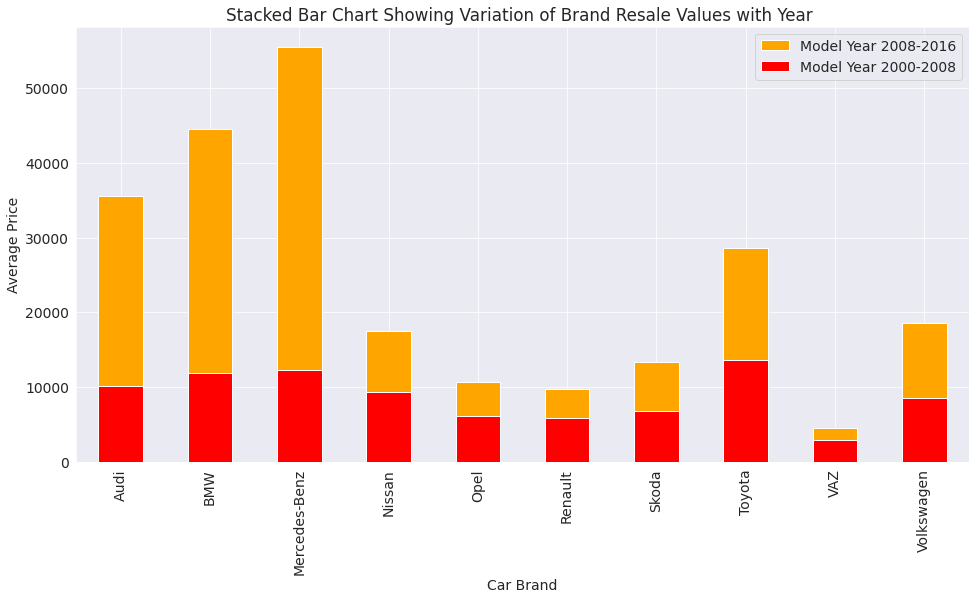

In [26]:
yeargroup_08_16.groupby(['car'])['price'].mean().plot(kind='bar', figsize=(16,8), color='orange');
yeargroup_00_08.groupby(['car'])['price'].mean().plot(kind='bar', figsize=(16,8), color='red');
plt.xlabel('Car Brand')
plt.ylabel('Average Price')
plt.title('Stacked Bar Chart Showing Variation of Brand Resale Values with Year ')
plt.legend(labels=('Model Year 2008-2016', 'Model Year 2000-2008'));

**Resale Values** of

*   **Mercedes-Benz, BMW and Audi** is **affected the most.** It reduces drastically with year. Definitely as they are all luxury brands.
*   **Other Brands** is more **stable.** These brands are more common and are used by common people, hence they are economically more stable and affordable.



**6. What is the percentage of unregistered cars?**  
We can directly analyse the data from the main dataset.

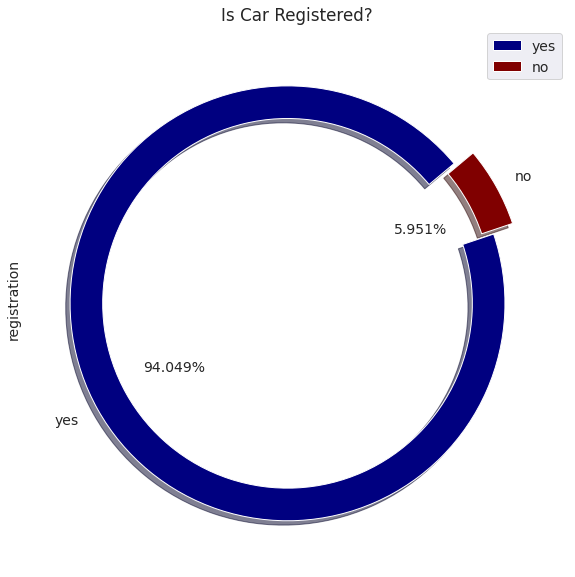

In [27]:
data['registration'].value_counts().plot(kind='pie', explode=(0.05, 0.05), autopct='%.3f%%', wedgeprops=dict(width=0.15), startangle=40, figsize=(10,10), shadow=True, cmap='jet', legend=True);
plt.title('Is Car Registered?');

Though, the price of unregistered cars is lower, people usually **don't prefer** buying one.

**7. How do unregistered car differ from registered car in price?**  
Year group 2008- 2016 is taken into consideration with top brands.

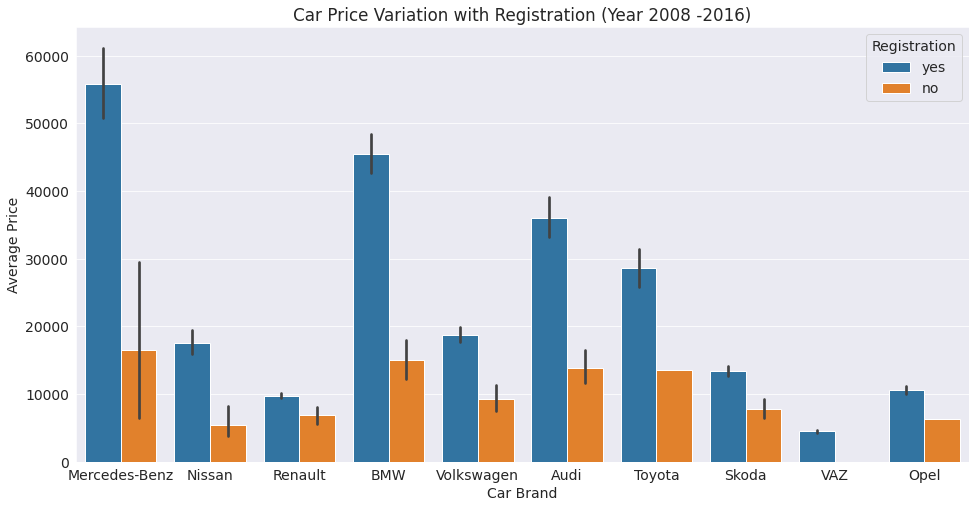

In [28]:
plt.figure(figsize=(16,8))
sns.barplot(x=yeargroup_08_16.car, y=yeargroup_08_16.price, data=yeargroup_08_16, hue=yeargroup_08_16.registration);
plt.legend(title='Registration',loc='upper right')
plt.xlabel('Car Brand');
plt.ylabel('Average Price');
plt.title('Car Price Variation with Registration (Year 2008 -2016)');

For year group 2000 - 2008.

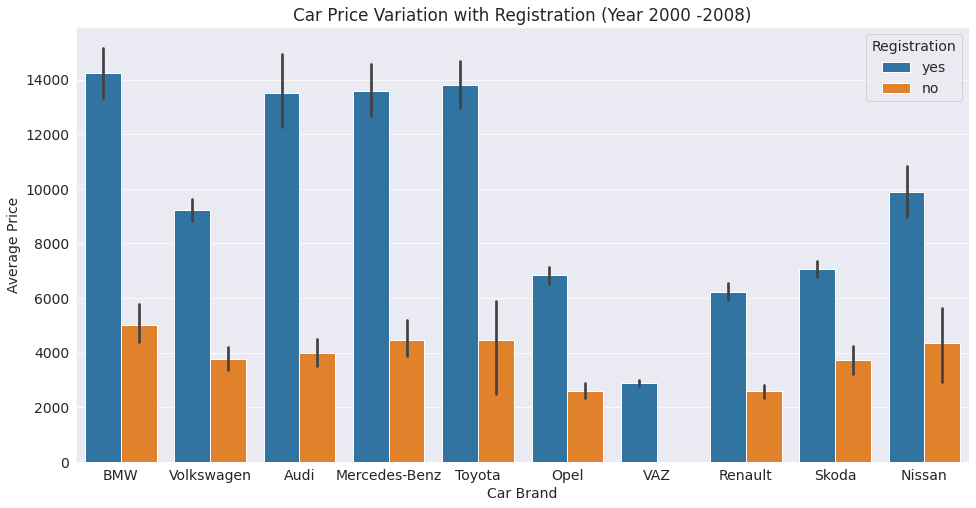

In [29]:
plt.figure(figsize=(16,8))
sns.barplot(x=yeargroup_00_08.car, y=yeargroup_00_08.price, data=yeargroup_00_08, hue=yeargroup_00_08.registration);
plt.legend(title='Registration',loc='upper right')
plt.xlabel('Car Brand');
plt.ylabel('Average Price');
plt.title('Car Price Variation with Registration (Year 2000 -2008)');

At all times, **unregistered car's price** is **significantly lower** than the registered car's price. Probably due to the risks of possesing an unregistered car. Therefore, it is not preferred.

---
<a name = Section9></a>
# **9. Summarization**
---
After a long complete analysis on used cars, let's conclude and gain some actionable insights.

<a name = Section91></a>
### **9.1 Conclusion**

- **Volkswagen and Mercedes-Benz are the most popular brands. Volkswagen is an economic brand, whereas Mercedes_benz is a luxury brand.**

- **Petrol engine type is most preferred, while diesel is preferred comparatively little lesser.**

- **Sedan is the most popular body type. There are significant number of other body type cars available too.**

- **Cars of the model year, from around last 15 years _(2000- 2016)_ are high for sale.**

- **Resale values of luxury brands suffer more when compared to economic brands.**

- **Unregistered cars, though cheaper in price, are not preferred.**

<a name = Section92></a>
### **9.2 Actionable Insights**

- **Car with popular specifications are comparatively cheaper than others.**
- **The dataset can be grouped by brands, preferably into _"Luxury"_, _"Economic"_ and _"Emerging-Economic"_ as they all have different trends in variation of price.**